# Bucketing method 

## Abstract

Bucketing is a method to reduce sample size, but save original metrics stats like mean and variance. As an additional benefit, our sample becomes distributed similarly to normal. So, we are moving to a new statistical unit - the bucket. 

This technique is in one group with Bootstrap and Poisson Bootstrap, but reduces calculation by  lack of resampling.

## Code / research

In [223]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scipy.stats as sps
from random import randint


Sample Mean                    = 1.0012881779683311
SEM = sample var / sample size = 0.0010021192074114965




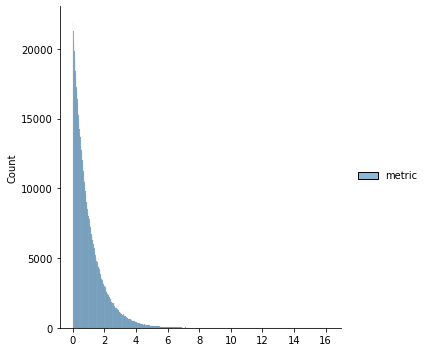

In [224]:
# Generate sample from exponential distribution:
sample_size = int(1e6)
expon_sample = sps.expon().rvs(sample_size)
df = pd.DataFrame(expon_sample, columns=['metric'])

# Let's look at what we got: 
s_mean, s_sem = df.mean(), sps.sem(df)

print(f"""
Sample Mean                    = {float(s_mean)}
SEM = sample var / sample size = {float(s_sem)}

""")
sns.displot(df)

In [225]:
# Split the sample randomly into buckets:
number_of_buckets = int(1e4)
generated_buckets = [randint(1, number_of_buckets) for _ in range(df.shape[0])]

# Calculate stats via buckets: 
bucket_sample = (df.assign(bucket=generated_buckets)
                   .groupby('bucket')["metric"]
                   .agg(['mean', 'count'])
                )
bucket_sample

,mean,count
bucket,,
1,0.813569,103
2,0.991676,91
3,0.806703,90
4,1.079687,92
5,0.945063,105
...,...,...
9996,1.073939,93
9997,0.834333,89
9998,1.046668,117



Sample mean        = 1.0012881779683311
Bucket Sample Mean = 1.0012572775932593


SEM                = 0.0010021192074114965
Bucket SEM         = 0.0010050230572892884





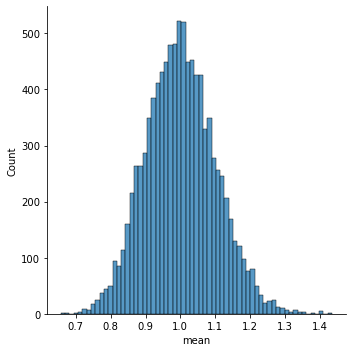

In [226]:
# Let's look at what we got: 
b_mean, b_sem = bucket_sample["mean"].mean(), sps.sem(bucket_sample["mean"])

print(f"""
Sample mean        = {float(s_mean)}
Bucket Sample Mean = {float(b_mean)}


SEM                = {float(s_sem)}
Bucket SEM         = {float(b_sem)}


""")
sns.displot(bucket_sample["mean"])